<a href="https://colab.research.google.com/github/mmacom/Proiecte_facultate_py/blob/main/invatareautomatatema4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Prezentarea algoritmilor
# - Regresia Logistica: Un model statistic folosit pentru clasificare binară, care estimează probabilitatea ca o observație să aparțină unei anumite clase.
# - KNN (K-Nearest Neighbors): Un algoritm bazat pe vecinătatea celor mai apropiați k vecini, utilizat pentru clasificare.
# - Naive Bayes: Un algoritm bazat pe teorema lui Bayes, care presupune independența caracteristicilor.
# - ID3 (Iterative Dichotomiser 3): Un algoritm de învățare a arborilor de decizie bazat pe entropie.
# - Random Forest: Un ansamblu de arbori de decizie care combină predicțiile mai multor arbori pentru a obține rezultate mai precise.
# - AdaBoost: Un algoritm de boosting care combină mai multe modele slabe pentru a construi un model puternic.

In [7]:
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(20)])
data['Class'] = y

 2. Descrierea problemei
# Vom rezolva problema detectării fraudelor în tranzacții financiare. Setul de date conține caracteristici numerice ale tranzacțiilor,
# iar etichetele indică dacă o tranzacție este frauduloasă sau nu. Scopul este să comparăm performanța celor șase algoritmi pentru această problemă.

 3. Generarea setului de date sintetic

In [2]:
!pip install scikit-learn
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples=10000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(20)])
data['Class'] = y

 4. Împărțirea setului de date în antrenament și testare

In [4]:
from sklearn.model_selection import train_test_split # Import the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5. Standardizarea caracteristicilor

In [6]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6. Antrenarea modelelor

In [9]:
# Import the necessary class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Now you can use LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# ... rest of your code ...

7.  Evaluarea modelelor

In [11]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Initialize and train models
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

knn = KNeighborsClassifier() # Initialize KNN
knn.fit(X_train, y_train) # Train KNN
y_pred_knn = knn.predict(X_test) # Predict using KNN

nb = GaussianNB() # Initialize Naive Bayes
nb.fit(X_train, y_train) # Train Naive Bayes
y_pred_nb = nb.predict(X_test) # Predict using Naive Bayes

id3 = DecisionTreeClassifier(criterion='entropy') # Initialize ID3
id3.fit(X_train, y_train) # Train ID3
y_pred_id3 = id3.predict(X_test) # Predict using ID3

rf = RandomForestClassifier() # Initialize Random Forest
rf.fit(X_train, y_train) # Train Random Forest
y_pred_rf = rf.predict(X_test) # Predict using Random Forest

adaboost = AdaBoostClassifier() # Initialize AdaBoost
adaboost.fit(X_train, y_train) # Train AdaBoost
y_pred_adaboost = adaboost.predict(X_test) # Predict using AdaBoost


# ... (rest of your code remains the same) ...

models = {
    'Logistic Regression': y_pred_logreg,
    'KNN': y_pred_knn,
    'Naive Bayes': y_pred_nb,
    'ID3': y_pred_id3,
    'Random Forest': y_pred_rf,
    'AdaBoost': y_pred_adaboost
}

# ... (rest of your code to calculate and print metrics remains the same) ...

8.Afișarea metricilor și comparația rezultatelor

In [13]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# ... (Your existing code to initialize and train models remains the same) ...

# Calculate confusion matrices and metrics for each model
conf_matrices = {}  # Initialize an empty dictionary to store confusion matrices
metrics = {}  # Initialize an empty dictionary to store metrics

for model_name, y_pred in models.items():
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)  # Calculate and store confusion matrix
    metrics[model_name] = {  # Calculate and store metrics
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Now you can print the confusion matrices and metrics
for model_name, cm in conf_matrices.items():
    print(f"\nMatricea de Confuzie {model_name}:")
    print(cm)
    print(f"Metrici {model_name}: {metrics[model_name]}")


Matricea de Confuzie Logistic Regression:
[[2823   15]
 [ 107   55]]
Metrici Logistic Regression: {'Accuracy': 0.9593333333333334, 'Recall': 0.3395061728395062, 'Precision': 0.7857142857142857, 'F1-Score': 0.47413793103448276}

Matricea de Confuzie KNN:
[[2827   11]
 [ 127   35]]
Metrici KNN: {'Accuracy': 0.954, 'Recall': 0.21604938271604937, 'Precision': 0.7608695652173914, 'F1-Score': 0.33653846153846156}

Matricea de Confuzie Naive Bayes:
[[2707  131]
 [  62  100]]
Metrici Naive Bayes: {'Accuracy': 0.9356666666666666, 'Recall': 0.6172839506172839, 'Precision': 0.4329004329004329, 'F1-Score': 0.5089058524173028}

Matricea de Confuzie ID3:
[[2753   85]
 [  78   84]]
Metrici ID3: {'Accuracy': 0.9456666666666667, 'Recall': 0.5185185185185185, 'Precision': 0.4970414201183432, 'F1-Score': 0.5075528700906344}

Matricea de Confuzie Random Forest:
[[2827   11]
 [  93   69]]
Metrici Random Forest: {'Accuracy': 0.9653333333333334, 'Recall': 0.42592592592592593, 'Precision': 0.8625, 'F1-Score'

9.  Vizualizarea rezultatelor

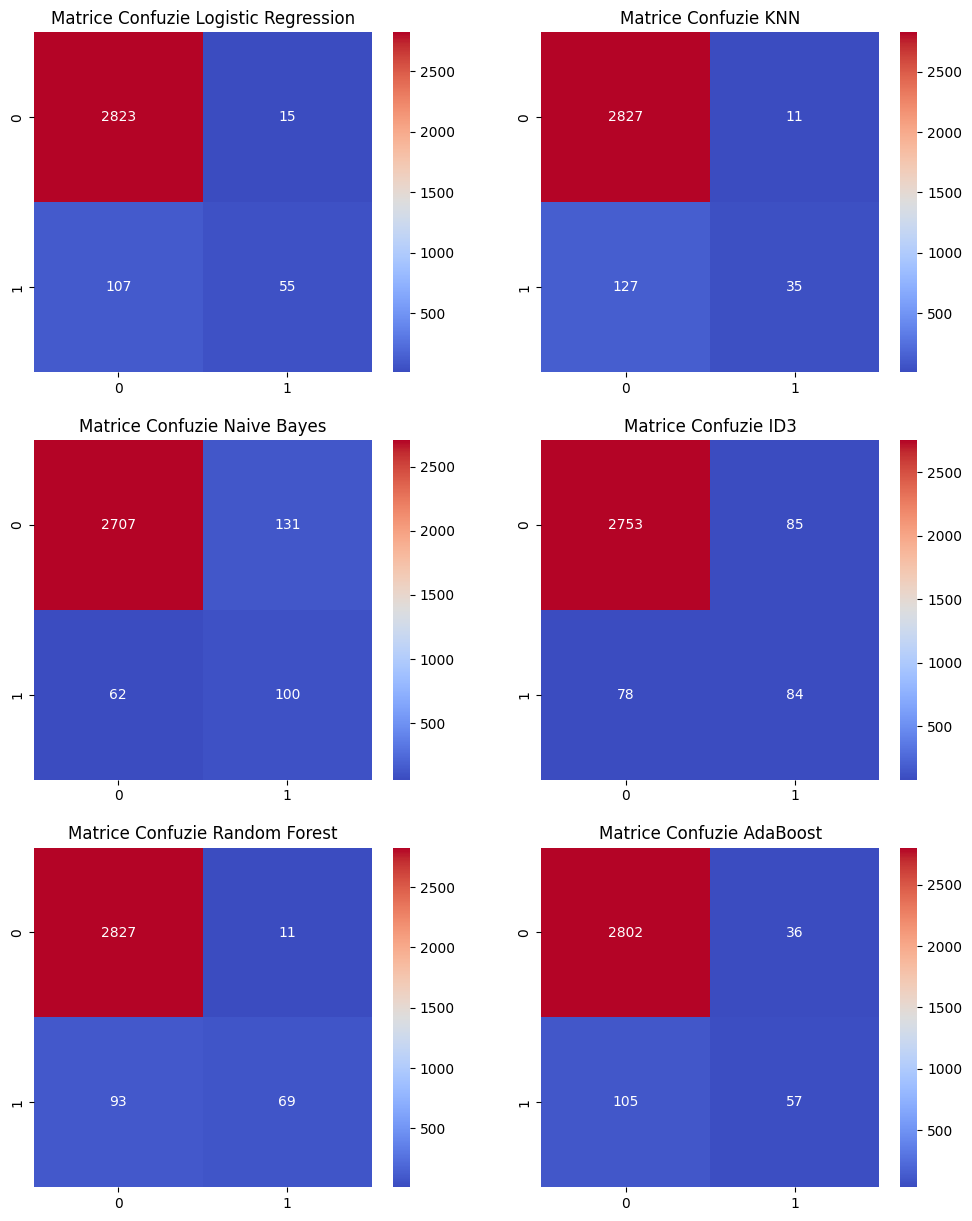

In [15]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(12, 15))
for ax, (model_name, cm) in zip(axes.flatten(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='coolwarm')
    ax.set_title(f"Matrice Confuzie {model_name}")
plt.show()

10.  Concluzii
# Comparăm metricile obținute și discutăm care algoritm oferă rezultate mai bune pentru detectarea fraudei.